# Origins of path spatiotemporal codes in hippocampal circuit
Compare portions of time/distance cells vs place cells in light/dark environments, or tone vs no tone conditions

### TODO:
- Open-field vs LT
- Reward vs no reward LT
- LT vs norewards vs toneLT
- Plot timecourse (LT1, LT2, LT3, toneLT1, toneLT2, toneLT3, seqLT1, seqLT2, etc), average for all animals
- Normalize per animal!
- Information content (AMI distribution) vs specific cell tuning (portion time cells, portion place cells, etc over time)

In [1]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('plot_style.mplstyle')

import yaml
import numpy as np
np.random.seed(42)
import pingouin as pg
import pandas as pd
import h5py
import os
from functions.signal_processing import smooth_1D
from tqdm import tqdm

# Params
with open('params.yaml','r') as file:
    params = yaml.full_load(file)

In [2]:
sessionList=os.listdir(os.path.join(params['path_to_results'],'tuning_data'))
data_list = [] # cell, animal,day,condition,AMI,pvalue
sessionList=os.listdir(os.path.join(params['path_to_results'],'tuning_data'))
for session in tqdm(sessionList):
    if os.path.exists(os.path.join(params['path_to_results'],'tuning_data',session,'info.yaml')): # TODO: Report any file missing
        info_file=open(os.path.join(params['path_to_results'],'tuning_data',session,'info.yaml'),'r')
        session_info = yaml.full_load(info_file)
        spatial_file = h5py.File(os.path.join(params['path_to_results'],'tuning_data',session,'spatial_tuning.h5'), 'r')
        temporal_file = h5py.File(os.path.join(params['path_to_results'],'tuning_data',session,'temporal_tuning.h5'), 'r')
        distance_file = h5py.File(os.path.join(params['path_to_results'],'tuning_data',session,'distance_tuning.h5'), 'r')
        direction_file = h5py.File(os.path.join(params['path_to_results'],'tuning_data',session,'direction_tuning.h5'), 'r')
        velocity_file = h5py.File(os.path.join(params['path_to_results'],'tuning_data',session,'velocity_tuning.h5'), 'r')

        for i in range(session_info['numNeurons']):
            data_list.append( #This will create one list entry per cell
                {
                    # Basic conditions
                    'subject':session_info['subject'],
                    'region':session_info['region'],
                    'day':session_info['day'],
                    'condition':session_info['condition'],
                    'task':session_info['task'],
                    'darkness':session_info['darkness'],
                    'optoStim':session_info['optoStim'],
                    'rewards':session_info['rewards'],
                    # Info metrics
                    'spatial_info':spatial_file['AMI'][i],
                    'temporal_info':temporal_file['AMI'][i],
                    'distance_info':distance_file['AMI'][i],
                    'velocity_info':velocity_file['AMI'][i],
                    'heading_info':direction_file['AMI'][i],
                    'spatial_pvalue':spatial_file['p_value'][i],
                    'temporal_pvalue':temporal_file['p_value'][i],
                    'distance_pvalue':distance_file['p_value'][i],
                    'velocity_pvalue':velocity_file['p_value'][i],
                    'heading_pvalue':direction_file['p_value'][i]
                }
            )
        
        # Close files
        info_file.close()
        temporal_file.close()
        spatial_file.close()
        distance_file.close()
        direction_file.close()
        velocity_file.close()

df = pd.DataFrame(data_list)

100%|██████████| 253/253 [00:21<00:00, 11.61it/s]


In [3]:
# Specify the type of maze: linear or open
df['maze']=''
df.loc[df['task']=='LT','maze']='linear'
df.loc[df['task']=='legoLT','maze']='linear'
df.loc[df['task']=='legoToneLT','maze']='linear'
df.loc[df['task']=='legoSeqLT','maze']='linear'
df.loc[df['task']=='OF','maze']='open'
df.loc[df['task']=='legoOF','maze']='open'
df.loc[df['task']=='plexiOF','maze']='open'

# Spatiotemporal information in linear vs open environments

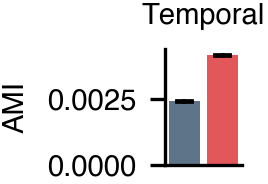

In [18]:
plt.figure(figsize=(.33,.5))
sns.barplot(
    data=df.query("region=='CA1' and rewards==True and temporal_pvalue<.05"),
    #x='region',
    x='maze',
    y='temporal_info',
    errorbar='se',
    palette=['C0','C6'],
    errcolor='k',
    capsize=.4
)
n_subjects=len(df.query("region=='CA1' and rewards==True and temporal_pvalue<.05").subject.unique())
n_neurons=len(df.query("region=='CA1' and rewards==True and temporal_pvalue<.05").index)
plt.title(f'Temporal')
plt.ylabel('AMI')
plt.xlabel('')
plt.xticks([])
#plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)
plt.savefig(os.path.join(params['path_to_results'],'figures', 'bar_temporal_open_vs_linear.pdf'))

In [ ]:
# Stats

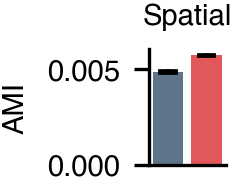

In [21]:
plt.figure(figsize=(.33,.5))
sns.barplot(
    data=df.query("region=='CA1' and rewards==True and spatial_pvalue<.05"),
    #x='region',
    x='maze',
    y='spatial_info',
    errorbar='se',
    palette=['C0','C6'],
    errcolor='k',
    capsize=.4
)
plt.title(f'Spatial')
plt.ylabel('AMI')
plt.xlabel('')
plt.xticks([])
plt.savefig(os.path.join(params['path_to_results'],'figures', 'bar_spatial_open_vs_linear.pdf'))

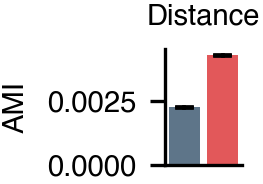

In [22]:
plt.figure(figsize=(.33,.5))
sns.barplot(
    data=df.query("region=='CA1' and rewards==True and distance_pvalue<.05"),
    #x='region',
    x='maze',
    y='distance_info',
    errorbar='se',
    palette=['C0','C6'],
    errcolor='k',
    capsize=.4
)
plt.title(f'Distance')
plt.ylabel('AMI')
plt.xlabel('')
plt.xticks([])
#plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)
plt.savefig(os.path.join(params['path_to_results'],'figures', 'bar_distance_open_vs_linear.pdf'))

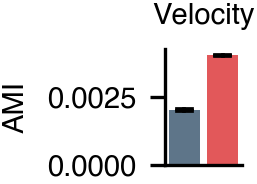

In [23]:
plt.figure(figsize=(.33,.5))
sns.barplot(
    data=df.query("region=='CA1' and rewards==True and velocity_pvalue<.05"),
    #x='region',
    x='maze',
    y='velocity_info',
    errorbar='se',
    palette=['C0','C6'],
    errcolor='k',
    capsize=.4
)
plt.title(f'Velocity')
plt.ylabel('AMI')
plt.xlabel('')
plt.xticks([])
#plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)
plt.savefig(os.path.join(params['path_to_results'],'figures', 'bar_velocity_open_vs_linear.pdf'))

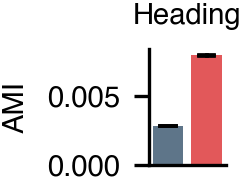

In [24]:
plt.figure(figsize=(.33,.5))
sns.barplot(
    data=df.query("region=='CA1' and rewards==True and heading_pvalue<.05"),
    #x='region',
    x='maze',
    y='heading_info',
    errorbar='se',
    palette=['C0','C6'],
    errcolor='k',
    capsize=.4
)
plt.title(f'Heading')
plt.ylabel('AMI')
plt.xlabel('')
plt.xticks([])
#plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)
plt.savefig(os.path.join(params['path_to_results'],'figures', 'bar_heading_open_vs_linear.pdf'))

In [20]:
# Stats:
print(f'N = {n_subjects} subjects, n = {n_neurons} neurons')

N = 22 subjects, n = 36117 neurons


## Normalize information metrics per animal

In [33]:
sns.barplot(data=df.groupby(['subject', 'maze'])['spatial_info'].mean(),
            x='maze')

ValueError: Could not interpret input 'maze'

In [ ]:
# Compare tone vs no tone linear track
#tone_df = CA1_df.query("task=='legoLT' or task == 'legoSeqLT' and optoStim==False")
tone_df = CA1_df.query("task=='legoLT' or task == 'legoSeqLT'")

# Compare dark vs light conditions
dark_df = CA1_df.query("task=='legoLT'")

In [170]:
# Drop animals that do not have legoSeqLT exposure
tone_df = tone_df.drop(tone_df.query("subject=='M246'").index)
tone_df = tone_df.drop(tone_df.query("subject=='M288'").index)
tone_df = tone_df.drop(tone_df.query("subject=='M1087'").index)
tone_df = tone_df.drop(tone_df.query("subject=='M314'").index)
tone_df = tone_df.drop(tone_df.query("subject=='M1090'").index)
tone_df = tone_df.drop(tone_df.query("subject=='M1092'").index)
tone_df = tone_df.drop(tone_df.query("subject=='M1088'").index)
tone_df = tone_df.drop(tone_df.query("subject=='M1046'").index)

In [171]:
# For each subject, reset day count from 0
# This is to convert from date (e.g. 20180602) to the actual number of previously experienced days (e.g 3)
for subject in tone_df.subject.unique():
    unique_days = tone_df.loc[(tone_df.subject==subject) & (tone_df.task=='legoLT'),'day'].unique()
    sorted_days=np.argsort(unique_days)
    for j in range(len(unique_days)):
        tone_df.day[(tone_df['subject']==subject) & (tone_df['day']==unique_days[j]) & (tone_df['task']=='legoLT')] = sorted_days[j]

    unique_days = tone_df.loc[(tone_df.subject==subject) & (tone_df.task=='legoSeqLT'),'day'].unique()
    sorted_days=np.argsort(unique_days)
    for j in range(len(unique_days)):
        tone_df.day[(tone_df['subject']==subject) & (tone_df['day']==unique_days[j]) & (tone_df['task']=='legoSeqLT')] = sorted_days[j]


/var/folders/6w/ytj5_yt9507dd2yb0htxhhfr0000gn/T/ipykernel_9515/2585357743.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tone_df.day[(tone_df['subject']==subject) & (tone_df['day']==unique_days[j]) & (tone_df['task']=='legoLT')] = sorted_days[j]
/var/folders/6w/ytj5_yt9507dd2yb0htxhhfr0000gn/T/ipykernel_9515/2585357743.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tone_df.day[(tone_df['subject']==subject) & (tone_df['day']==unique_days[j]) & (tone_df['task']=='legoLT')] = sorted_days[j]
/var/folders/6w/ytj5_yt9507dd2yb0htxhhfr0000gn/T/ipykernel_9515/2585357743.py:7: SettingWithCopyWarning: 
A value is tryin

In [175]:
# Only keep first 3 days of exposure
tone_df = tone_df.drop(tone_df.query("day>3").index)

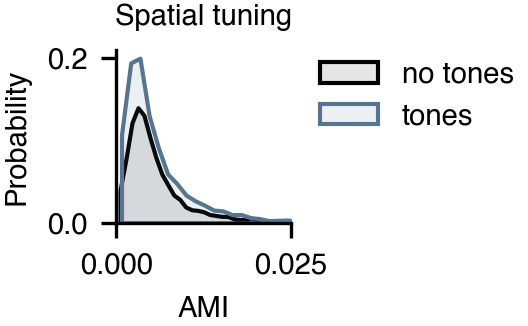

In [176]:
# Spatial coding with or without tones
plt.figure(figsize=(.75,.75))
sns.histplot(
             data=tone_df.query("task=='legoLT' and spatial_pvalue<.05"),
             x='spatial_info',
             bins=50,
             stat='probability',
             element='poly',
             alpha=.1,
             color='k',
             label='no tones')
sns.histplot(
             data=tone_df.query("task=='legoSeqLT' and spatial_pvalue<.05"),
             x='spatial_info',
             bins=50,
             stat='probability',
             element='poly',
             alpha=.1,
             color='C0',
             label='tones')
#plt.xscale('log')
plt.title('Spatial tuning')
plt.xlabel('AMI')
plt.xlim([0,.025])
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)
plt.savefig(os.path.join(params['path_to_results'],'figures', 'probhist_elapsed_spatial_noTone_vs_tone.pdf'))

In [187]:
# Temporal coding with or without tones
plt.figure(figsize=(.5,.75))
sns.barplot(
            data=tone_df.query("spatial_pvalue<.05"),
            x='day',
            hue='task',
            y='spatial_info',
            #label=['no tones','tones'],
            errorbar='se',
            capsize=.5,
            palette=['k', 'C0']
            )
plt.title('Spatial tuning')
plt.ylabel('AMI')
#plt.xticks([])
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)
#plt.savefig(os.path.join(params['path_to_results'],'figures', 'bar_spatial_noTone_vs_tone.pdf'))

KeyboardInterrupt: 

In [157]:
pg.ttest(x=tone_df.query("task=='legoLT' and spatial_pvalue<.05")['spatial_info'],
         y=tone_df.query("task=='legoSeqLT' and spatial_pvalue<.05")['spatial_info'])

/Users/guillaumeetter/.pyenv/versions/3.10.9/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: overflow encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/Users/guillaumeetter/.pyenv/versions/3.10.9/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: overflow encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,8.345895,8342.524536,two-sided,8.200943e-17,"[0.0, 0.0]",0.179217,2.688e+13,1.0


In [186]:
# Temporal coding with or without tones
plt.figure(figsize=(2,.75))
sns.lineplot(
            data=tone_df.query("distance_pvalue<.05"),
            x='day',
            hue='task',
            y='distance_info',
            #label=['no tones','tones'],
            errorbar='se',
            hue_norm=(0,1),
            #capsize=.5,
            #palette=['k', 'C0']
            )
plt.title('distance tuning')
plt.ylabel('AMI')
#plt.xticks([])
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)
#plt.savefig(os.path.join(params['path_to_results'],'figures', 'lines_overDays_temporal_noTone_vs_tone.pdf'))

ValueError: Unable to parse string "legoLT" at position 0

<Figure size 600x225 with 0 Axes>